# Exercise 13-2: Sentiment analysis on movie reviews
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews<br>
The sentiment labels are:<br>
<br>
0 - negative<br>
1 - somewhat negative<br>
2 - neutral<br>
3 - somewhat positive<br>
4 - positive<br>

In [4]:
from tqdm import tqdm_notebook as tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [82]:
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')
df = pd.concat([train_df, test_df], sort=True, ignore_index=True)

# Analyse Dataset

## Observe some records

In [83]:
df['Phrase'].iloc[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [84]:
df['Phrase'].iloc[1]

'A series of escapades demonstrating the adage that what is good for the goose'

### Strategy
1. `Phrase` column will be `lowercase()`
2. Find the `input_size` by finding the maximum word counting from `Phrase`
3. `word2idx` for word embedding
4. Check `imbalanced dataset` or not?

#### 1. lowercase()

In [85]:
df['Phrase'] = df['Phrase'].apply(lambda x : x.lower())

In [86]:
msg = df['Phrase'].iloc[0]

In [87]:
msg

'a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [88]:
alist = [i for i in msg.split(' ')]

In [89]:
df['tokenized'] = df['Phrase'].apply(lambda x : [i for i in x.split(' ')])

In [90]:
df['phrase_length'] = df['tokenized'].apply(lambda x : len(x))

#### 2. Find maximum input_size

In [91]:
df[df['phrase_length'] == df.phrase_length.max()]

,Phrase,PhraseId,SentenceId,Sentiment,tokenized,phrase_length
159836,the film is faithful to what one presumes are ...,159837,8685,NaN,"[the, film, is, faithful, to, what, one, presu...",56


#### 3. Prepare word embedding

In [196]:
from torch.utils.data import Dataset, DataLoader
from utils import Dictionary, ImbalancedDatasetSampler, WordDataset, RawDataset

In [162]:
my_dict = Dictionary()

In [163]:
# Simple cross check my order of executions
assert len(my_dict) == 0

In [164]:
total_dataset = RawDataset(df)

In [165]:
total_loader = DataLoader(dataset=total_dataset, num_workers=2) # No need to do shuffling since it is anaylyse phase

In [166]:
for i, (data, target) in enumerate(tqdm(total_loader)):
    for word in data:
        my_dict.add_word(word[0])

##### Save the dictionary to binary

In [171]:
import pickle

with open('dictioanry_data.pkl', 'wb') as output:
    pickle.dump(my_dict, output, pickle.HIGHEST_PROTOCOL)

##### Reuse the `my_dict` because it takes 5 minutes to build a dictionary

In [133]:
with open('dictioanry_data.pkl', 'rb') as input:
    my_dict = pickle.load(input)

In [190]:
len(my_dict)

19479

In [177]:
dict_length = len(my_dict)
zz = nn.Embedding(dict_length, 300)

#### 4. Imbalance checking
I have to check with `traing dataset` only

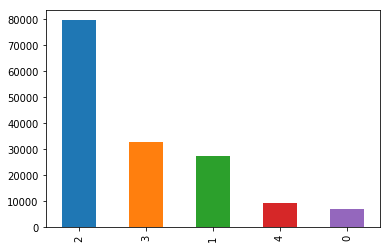

In [193]:
train_df.Sentiment.value_counts().plot.bar()